# 1. Neural Network Classifier with Scikit

Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using scikit-learn. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

In [1]:
# Loading some basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

# sklearn cleaning and model utiltiies
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.neural_network import MLPClassifier, MLPRegressor

# nltk for data cleaning
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [2]:

def load_data(samples=None):
    '''A function to load the comments in with the option of selecting a sample size'''
    df = pd.read_json("categorized-comments.jsonl",lines=True)
    if samples != None:
        df = df.sample(round(samples))
    return df


In [3]:
    
def stemmer(ser):
    '''Reducing the data complexity with the PortStemmer'''
    ps = PorterStemmer()
    string = ""
    for words in ser:
        string += str(ps.stem(words)) + " "
    return string.strip()

def clean_data(df):
    '''Cleans the data and removes unnecessary information'''
    df['txt'] = df['txt'].str.lower()
    # Removing \n (new lines)
    df["txt"] = df['txt'].str.replace("\n", " ")

    # Removing URLS
    df['txt'] = df['txt'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    df['txt'] = df['txt'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

    # Removing punctuation
    df["txt"] = df['txt'].str.replace('[^\w\s]','')

    # Creating the list of stop words

    stop = set(stopwords.words('english')) 

    df['txt'] = df['txt'].str.split().apply(lambda x: [item for item in x if item not in stop])
    df['txt'] = df['txt'].apply(stemmer)
    return df


def data_restructuring(df):
    '''Transforms the data into a TFIDF sparse matrix and Hot Encodes the labels'''
    cv = TfidfVectorizer()
    X = cv.fit_transform(df['txt'].values.astype('U'))
    
    lb = LabelBinarizer()
    y = lb.fit_transform(df['cat'])
    y_labels = lb.classes_
    
    return X, y, y_labels

In [4]:
# Loading in the data with a sample size of 60,000
df= load_data(60000)
df

,cat,txt
403237,video_games,Instead of buying the game you could... Just D...
367759,sports,FUCK
555821,video_games,What speech impediment was it?
597249,video_games,Wow review codes when put 13 days before the e...
405432,video_games,"Physics ≠ ragdoll. These are much more than ""r..."
...,...,...
441989,video_games,GIRLFRIEND!!!!!!!\nMAKE SANDWICH!!!!!\n\n\nNo ...
521870,video_games,Why is this getting downvoted?
343305,video_games,How did his tears taste?
406060,video_games,With Persona Q randomly releasing as a 3DS exc...


In [5]:
# Cleaning the data by removing stop words, stemming the data, etc
df = clean_data(df)
df

,cat,txt
403237,video_games,instead buy game could danc
367759,sports,fuck
555821,video_games,speech impedi
597249,video_games,wow review code put 13 day embargo launch date...
405432,video_games,physic ragdol much ragdol
...,...,...
441989,video_games,girlfriend make sandwich joke asid noodl soup ...
521870,video_games,get downvot
343305,video_games,tear tast
406060,video_games,persona q randomli releas 3d exclus coupl year...


In [6]:
# Checking how many values for each label we have in our data
df['cat'].value_counts()

video_games               43103
sports                    14497
science_and_technology     2400
Name: cat, dtype: int64

In [7]:
# Restructing the data into a sparse matrix and hot encoding the label data
# Also returning the y_labels for the confusion matrix at the end

X,y, y_labels = data_restructuring(df)

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# Logging the start time of the operation since it takes a while
start = datetime.datetime.now()
print("Operation Started: "+str(start.strftime("%m/%d/%y %H:%M:%S")))

# Building the model with 500,150 hidden layers
model = MLPClassifier(hidden_layer_sizes=[500,150], verbose=True, n_iter_no_change=10)

# Training the model
model.fit(X_train, y_train)

# Using the model to make predictions for our testing dataset
y_pred = model.predict(X_test)

# Finding the end time to calculate how long the training took.
end = datetime.datetime.now()
print("Operation Ended: "+str(end.strftime("%m/%d/%y %H:%M:%S")))
duration = end-start
print(f"Training Time: {str((duration.seconds // 3600)).zfill(2)}:\
{str((duration.seconds // 60 % 60)).zfill(2)}:\
{str((duration.seconds % 60)).zfill(2)}")

# Printing Accuracy, Precision, and Recall
print(f"Accuracy: {np.mean(y_pred == y_test)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred,average='macro')*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')*100:.2f}%")

Operation Started: 02/15/21 10:59:54
Iteration 1, loss = 1.01501420
Iteration 2, loss = 0.59653993
Iteration 3, loss = 0.46067632
Iteration 4, loss = 0.38003135
Iteration 5, loss = 0.30216126
Iteration 6, loss = 0.22706373
Iteration 7, loss = 0.17907598
Iteration 8, loss = 0.15597785
Iteration 9, loss = 0.14402401
Iteration 10, loss = 0.13808973
Iteration 11, loss = 0.13473178
Iteration 12, loss = 0.13166826
Iteration 13, loss = 0.12870866
Iteration 14, loss = 0.12733655
Iteration 15, loss = 0.12564059
Iteration 16, loss = 0.12491161
Iteration 17, loss = 0.12342614
Iteration 18, loss = 0.12286912
Iteration 19, loss = 0.12175238
Iteration 20, loss = 0.12087610
Iteration 21, loss = 0.12106925
Iteration 22, loss = 0.12002309
Iteration 23, loss = 0.11945448
Iteration 24, loss = 0.11886289
Iteration 25, loss = 0.11848673
Iteration 26, loss = 0.11825875
Iteration 27, loss = 0.11829929
Iteration 28, loss = 0.12070453
Iteration 29, loss = 0.12337856
Iteration 30, loss = 0.12045199
Iteration 31

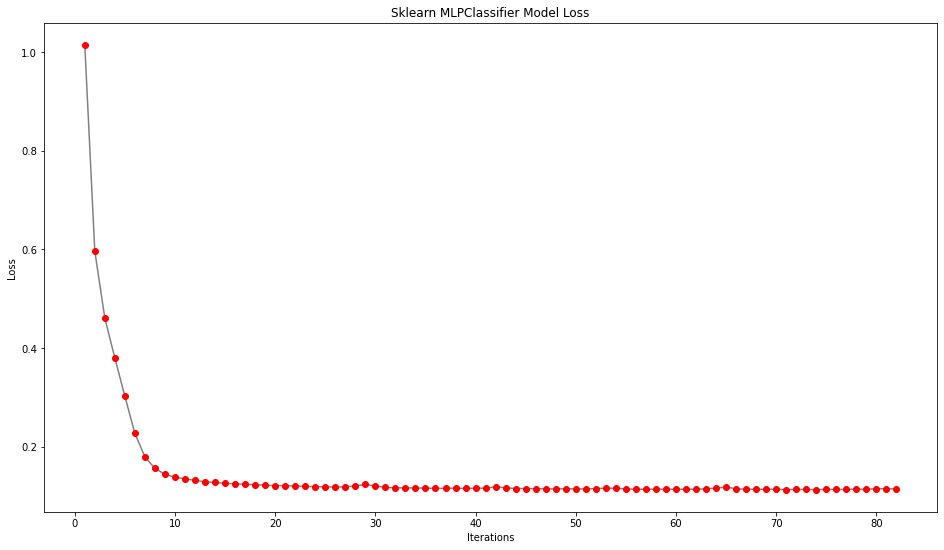

In [10]:
# Plotting the loss over each iteration in the model
plt.figure(figsize=(16,9))
plt.plot(range(1,model.n_iter_ + 1), model.loss_curve_, c = 'gray', zorder = 0);
plt.scatter(range(1,model.n_iter_ + 1), model.loss_curve_, c = 'red', zorder = 1);
plt.title("Sklearn MLPClassifier Model Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

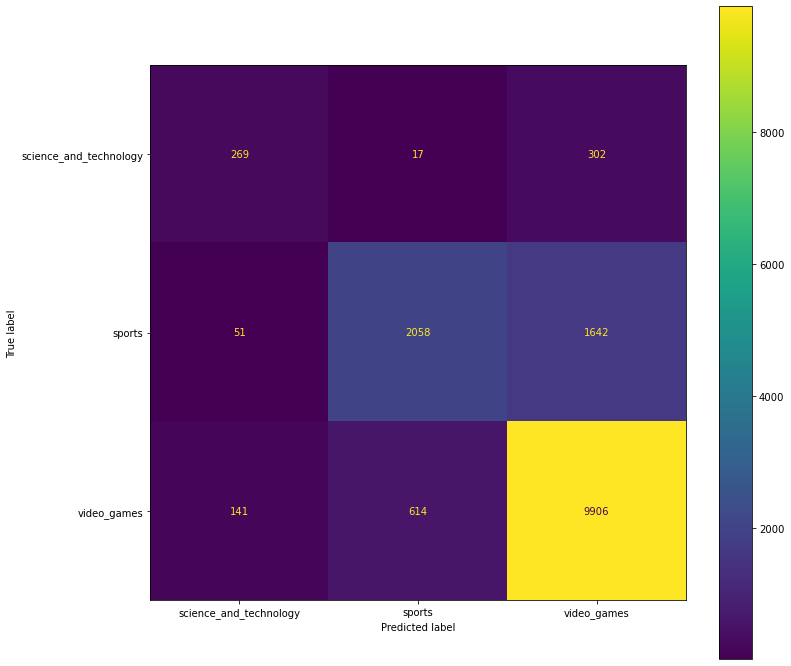

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Plotting a confusion matrix to visualize our classifications
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

fig, ax = plt.subplots(figsize=(12, 12))
fig = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=y_labels)
fig.plot(ax=ax)
plt.show()